# **Bienvenidos al Bootcamp Data Science & Analítica de Datos I - TITANIC**
    
- [Capítulo 1: Variables y Análisis](#analisis)
- [Capítulo 2: Visualizaciones Titanic](#visualizaciones)
- [Capítulo 3: Algoritmos de Clasificación Titanic](#clasificacion)

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.6; color: #333;">


**¿Cómo podría haber ayudado la IA?**


<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1920px-RMS_Titanic_3.jpg' width="650" height="250" />
<figcaption></figcaption></center>
</figure>

In [188]:
# Importamos librerias para procesamiero de datos y gráficas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

# Ignore warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.rcParams["figure.figsize"] = [10, 5]

# Importamos librerias para modelos de clasificación 
from funciones_bootcamp import compute_metrics, plot_confusion_matrix_and_reports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<a id="analisis"></a>

# **Capítulo 1: Variables y Análisis** 

## **1.1 Dataset, variables y tipos de variables**

### Carga del Dataset

Con el siguiente comando podemos extraer información almacenada en archivos csv.

In [189]:
# Se define la ruta del archivo .csv del cuál se quiere extraer información
ruta = '../Data/Inputs/Titanic-Dataset.csv'

# Se usa la función read_csv para cargar datos del archivo en la ruta especificada
full_data = pd.read_csv(ruta)

Con el siguiente comando podemos obtener las dimensiones de nuestro dataset

In [190]:
# Se usa la función shape para extraer el número de filas y columnas
full_data.shape

(891, 12)

El siguiente comando nos permitirá tener un acercamiento al dataset, observando los 10 primeros registros

In [191]:
# Se usa la función head para desplegar 10 registros del dataset
full_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Tipos de Variables

Vamos a extraer nuestros datos del *Titanic* desde el archivo .csv, crear un DataFrame de pandas y revisar los indicadores disponibles. Este conjunto de datos contiene información de 891 pasajeros con 12 atributos diferentes:

Variable                  | Descripción                                                                      | Tipo
--------------------------|----------------------------------------------------------------------------------|------------------------------
**Sobrevivió (Survived)** | Resultado de la supervivencia (0 = No; 1 = Sí)                                   | *Variable binaria*
**Clase (Pclass)**        | Clase socioeconómica (1 = Clase alta; 2 = Clase media; 3 = Clase baja)           | ________________
**Nombre (Name)**         | Nombre del pasajero                                                              | *Variable de texto*
**Sexo (Sex)**            | Sexo del pasajero                                                                | *Variable categórica nominal*
**Edad (Age)**            | Edad del pasajero                                                                | *Variable numérica discreta*
**SibSp**                 | Número de hermanos y cónyuges del pasajero a bordo                               | *Variable numérica discreta*
**Parch**                 | Número de padres e hijos del pasajero a bordo                                    | *Variable numérica discreta*
**Ticket**                | Número de boleto del pasajero                                                    | *Variable de texto*
**Tarifa (Fare)**         | Tarifa pagada por el pasajero                                                    | ________________
**Cabina (Cabin)**        | Número de cabina del pasajero                                                    | *Variable de texto*
**Embarcado (Embarked)**  | Puerto de embarque del pasajero (C = Cherburgo; Q = Queenstown; S = Southampton) | ________________
 

**Ejercicio #1**

Completa el tipo de variable de **Embarcado**, **Tarifa** y **Clase**

Ahora, podemos explorar los atributos y formatos de nuestros datos en el abt. Esto es independiente del tipo de variable que refleje cada uno de los datos.

Acá podemos encontrar diversos tipos de dato. Para el ejercicio, tenemos los siguientes:

- int64: refleja una variable con valores numéricos enteros.
- float64: refleja una variable con valores numéricos decimales.
- object: refleja una variable con una cadena de texto.

Para revisar estos tipos de dato, podemos hacer uso del método info() sobre nuestro abt.

In [192]:
# Se usa la función dtypes para obtener los tipos de variables presentes en el dataset
full_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **1.2 Análisis Univariado**

### Variables Cualitativas
Podemos obtener una representación de una tabla de frecuencias de las variables categóricas de la base. Por ejemplo, para la variable que refleja el puerto de embarcación:

In [193]:
# Se usa la función value_counts sobre la columna 'Embarked' para obtener los valores y su frecuencia
full_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

También podemos obtener esto de forma relativa, es decir, los porcentajes de cada puerto para el total de la base.

In [194]:
# Se define el objeto 'procentajes' como True para usarlo posteriormente
porcentajes = True

# Se usa la función vaue_counts nuevamente asignando porcentajes al parámetro normalize para obtener valores relativos
full_data['Embarked'].value_counts(normalize = porcentajes).round(4)*100

Embarked
S    72.44
C    18.90
Q     8.66
Name: proportion, dtype: float64

### Variables Cuantitativas

In [195]:
# Se usa la función mean sobre la variable 'Parch' para obtener la media
full_data.Parch.mean()

np.float64(0.38159371492704824)

In [196]:
# Se usa la función median sobre la variable 'Age' para obtener la mediana
full_data['Age'].median()

np.float64(28.0)

También se pueden calcular otras estadísticas descriptivas, como la desviación estándar, el mínimo, máximo.

- Desviación estándar: ```full_data.Age.std()```
- Mínimo: ```full_data.Age.min()```
- Máximo: ```full_data.Age.max()```

#### **Ejercicio 2**

In [197]:
# Tu código va aquí


In [198]:
# Tu código va aquí


In [199]:
# Tu código va aquí


## **1.3 Análisis Bivariado**

### Variables Cualitativas

Por medio del concepto de tabla cruzado que vimos hace unos momentos, se pude observar el comportamiento de las variables categóricas `Sex` y `PClass`

In [200]:
# Se define el objeto filas con la columna 'Pclass'
filas_tabla_cruzada = full_data['Pclass']

# Se define el objeto columnas con la columna 'Sex'
columnas_tabla_cruzada = full_data['Sex']

# Se usa la función crosstab definiendo las variables por medio de los objetos creadas anteriormente 
pd.crosstab(filas_tabla_cruzada, columnas_tabla_cruzada)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


También se puede obtener con valores relativos o porcentajes

In [201]:
# Se define el objeto procentajes como True para usarlo posteriormente en la función crosstab
porcentajes = True

# Se usa la función crosstab definiendo las variables por medio de los objetos creadas anteriormente y definiendo el parámetro normalize
# con el objeto procentajes
pd.crosstab(filas_tabla_cruzada, columnas_tabla_cruzada, normalize = porcentajes).round(4)*100

Sex,female,male
Pclass,,
1,10.55,13.69
2,8.53,12.12
3,16.16,38.95


### Variables Cuantitativas

Se puede hacer una revisión de la correlación entre dos variables

In [202]:
# Se define la variable 'par' como la columna 'Fare' para ser usada como referencia en la comparación de correlación
par = full_data['Fare']

# Se usa la función corr para calcular la correlación entre la columna 'Age' y la columna Fare (objeto 'par')
full_data.Age.corr(par)

np.float64(0.09606669176903888)

## **1.4 Tratamiento de variables**

Veamos nuestro dataset antes de hacer cualquier tratamiento.

In [203]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Selección de variables

Para el propósito del ejercicio, conocemos que existen algunas variables que no nos aportan mucha información más allá de poder identificar al pasajero. Estas variables son:

- Nombre del pasajero.
- Id del pasajero.
- Número de ticket del pasajero.
- Cabina del pasajero.

Estas variables se pueden borrar del dataset.


In [204]:
# Se definen las columnas a eliminar en la lista 'columnas_eliminar'
columnas_eliminar = ['Name', 'PassengerId', 'Ticket', 'Cabin']

# Se eliminan las columnas especificadas usando la función drop
full_data = full_data.drop(columnas_eliminar, axis=1)

Si se quiere corroborar la eliminación, se puede volver a mostrar los 10 primeros registros del dataset

In [205]:
# Se utiliza la función head para mostrar los primeros registros del dataset y verificar la eliminación de columnas
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Datos Faltantes

Podemos obtener la cantidad de datos faltantes de cada uno de nuestros campos con el método isnull().sum() sobre nuestro dataset.

In [206]:
# Se utiliza la función isnull junto con sum para contar el número de valores nulos en cada columna del dataset
full_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Imputación - Variable `Embarked`

Vamos a imputar la variable Embarked, que tiene solo 2 valores faltantes.

In [207]:
# Filtra del dataset para dejar los registros que tiene valores faltantes en la variable Embarked 
dataset_nulos_embarked = full_data[full_data['Embarked'].isnull()]

# Guardamos los índices de los registros con faltantes en Embarked
indices_nulos_edad = full_data[full_data['Embarked'].isnull()].index.tolist()

# Imprime el dataset filtrado por valores faltantes en Embarked
dataset_nulos_embarked.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


Realizaremos imputación por clase del tiquete (Pclass), y se imputará con el valor más frecuente dependiendo de la categoría.

In [208]:
# Se define una lista con la variable 'Pclass' que se usará para agrupar
variable_agrupacion = ['Pclass']

# Se llenan los valores nulos de la columna 'Embarked' con el valor más frecuente (moda), agrupando por 'Pclass'
full_data['Embarked'] = full_data.groupby(variable_agrupacion)['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))


Validamos que la información se encuentre completa ahora que se realizó la imputación.

In [209]:
# Imprime los registros con los índices guardados anteriormente
full_data.loc[indices_nulos_edad].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,S
829,1,1,female,62.0,0,0,80.0,S


In [210]:
# Se cuenta el número de valores nulos restantes en la columna 'Embarked' después de la imputación
full_data['Embarked'].isnull().sum()

np.int64(0)

### Imputación - Variable `Age`


#### **Ejercicio #3**

In [211]:
# Se define una lista con la variable 'Pclass' que se usará para agrupar
variable_agrupacion = ['Pclass']

# Aquí va tu código

Validamos que la información se encuentre completa ahora que se realizó la imputación.

In [212]:
# Se cuenta el número de valores nulos restantes en la columna 'Age' después de la imputación
full_data['Age'].isnull().sum()

np.int64(177)

### Label Encoding - Variable `Pclass`

La única variable categórica ordinal en el dataset es Pclass. Por esto realizaremos Label Encoding donde la Clase alta será 1 y la clase baja 3.

In [213]:
# Define el orden de las categorías para la variable 'Pclass'
pclass_categories = [1, 2, 3]

# Define si la variable categórica debe ser ordenada
ordenado = True

# Convierte la columna 'Pclass' en una variable categórica con un orden específico usando Label Encoding
full_data['Pclass'] = pd.Categorical(
    full_data['Pclass'],
    categories=pclass_categories,
    ordered=ordenado
)

In [214]:
# Muestra el tipo de datos de la columna 'Pclass' para verificar que se haya convertido en una variable categórica ordenada
full_data.Pclass.dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=True, categories_dtype=int64)

### One-Hot Encoding - Variables Catégoricas Nominales

Buscamos aplicar la técnica convirtiendo las categorias de estas columnas en columnas binarias con unos y ceros.

In [215]:
# Define las variables categóricas que se codificarán con one-hot encoding
categorical_vars = ['Sex', 'Embarked']

# Definimos el tipo de las columnas binarias
tipo_binarias = 'int'

# Aplica la codificación one-hot a las variables categóricas especificadas
full_data = pd.get_dummies(full_data, columns=categorical_vars, dtype=tipo_binarias)

Ahora validemos la nueva estructura de nuestro dataset.

In [216]:
# Muestra los primeros registros del dataset para verificar la aplicación de la codificación one-hot y otros cambios recientes
full_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Teniendo en cuenta que en la columna `Sex_male` los 1 representan el masculino y los 0 el femenino, podemos eliminar la columna `Sex_female` o viceversa. 

De igual forma sucede con el puerto de embarque, podemos eliminar alguna de las tres columnas.

Ahora guardamos el dataset pre-procesado que se usará para la generación de valor posteriormente

In [217]:
# Define las columnas a eliminar por redundancia
columnas_eliminar = ['Sex_female', 'Embarked_Q']

# Se eliminan las columnas definidas con la función drop
full_data = full_data.drop(columns=columnas_eliminar)

# Muestra los primeros registros del dataset para verificar las columnas
full_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Ahora guardamos el dataset pre-procesado que se usará para la generación de valor posteriormente

In [218]:
full_data.to_csv('../Data/Inputs/data_preprocesada.csv', index= False)

<a id="visualizaciones"></a>
# **Capítulo 2: Visualizaciones Titanic**


<figure>
<center>
<img src='https://dantaanalytics.com/wp-content/uploads/2020/10/data-visualization.jpg' width="650" height="450" />
<figcaption></figcaption></center>
</figure>




La visualización de datos es una herramienta esencial en la ciencia de datos que permite transformar datos complejos en representaciones visuales fáciles de interpretar. A través de gráficos, diagramas y otros elementos visuales, es posible identificar patrones, tendencias y relaciones en los datos que de otra manera podrían pasar desapercibidos.

En el contexto de la clasificación binaria, como en el caso de los sobrevivientes del Titanic, la visualización de datos juega un papel crucial. Al analizar datos de pasajeros como edad, género, clase de boleto y su estado de supervivencia, las visualizaciones permiten descubrir rápidamente cuáles de estos factores influyeron más en la probabilidad de sobrevivir. Por ejemplo, un gráfico de barras puede mostrar de manera clara cómo la tasa de supervivencia varía según la clase de boleto o el género.

In [219]:
full_data = pd.read_csv('../Data/Inputs/Titanic-Dataset.csv')

In [220]:
print(full_data.shape)
full_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **2.1.Gráficos de cantidades**


### **Gráficos de Barras**

Utilizados para comparar diferentes categorías entre sí. Las barras pueden ser verticales u horizontales.



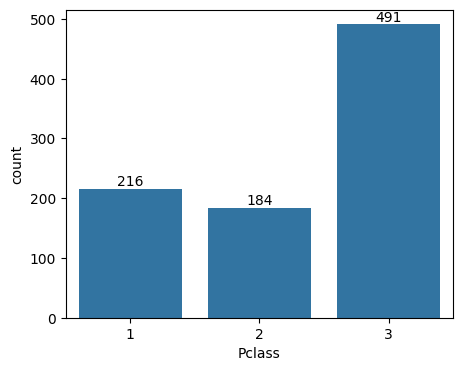

In [221]:
# Grafico de barras verticales 
plt.figure(figsize=(5, 4))

ax = sns.countplot(x='Pclass', data=full_data)

# Add labels
ax.bar_label(ax.containers[0])


plt.show()

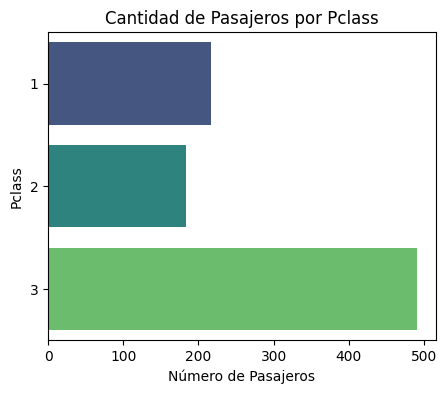

In [222]:
# Grafico de barras horizontales
plt.figure(figsize=(5, 4))

variable='Pclass'

sns.countplot(y=variable, data=full_data, palette='viridis')

# Añadir etiquetas y título
plt.ylabel(f'{variable}')
plt.xlabel('Número de Pasajeros')
plt.title(f'Cantidad de Pasajeros por {variable}')
plt.show()

Se observa que la mayor cantidad de pasajeros eran de la clase 3

### **Gráfico de barras abierto por otra variable categórica**

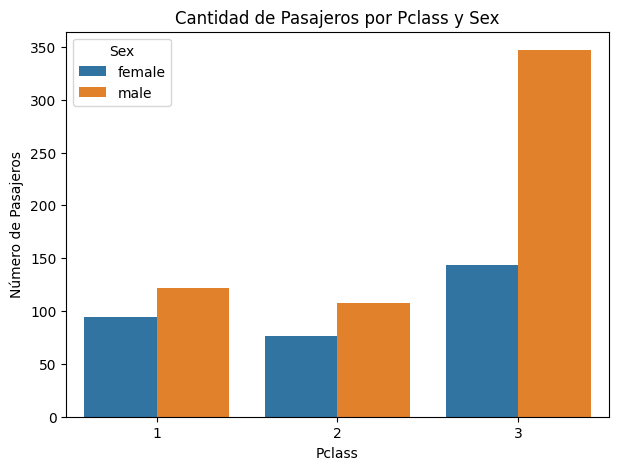

In [223]:
# Gráfico de barras para dos variables categóricas 
plt.figure(figsize=(7,5))

dataset=full_data
variable1='Pclass'
variable2='Sex'

sns.countplot(x=variable1, hue=variable2, data=dataset)

plt.xlabel(f'{variable}')
plt.ylabel('Número de Pasajeros')
plt.title(f'Cantidad de Pasajeros por {variable1} y {variable2}')
plt.show()

Se puede ver que la clase 3 tiene más mujeres que las otras clases, sin embargo, la proporción respecto de los hombres de esa clase es mucho menor

**Otro ejemplo**: gráfico de barras por Género y Clase, comparando total pasajeros vs sobreviviente

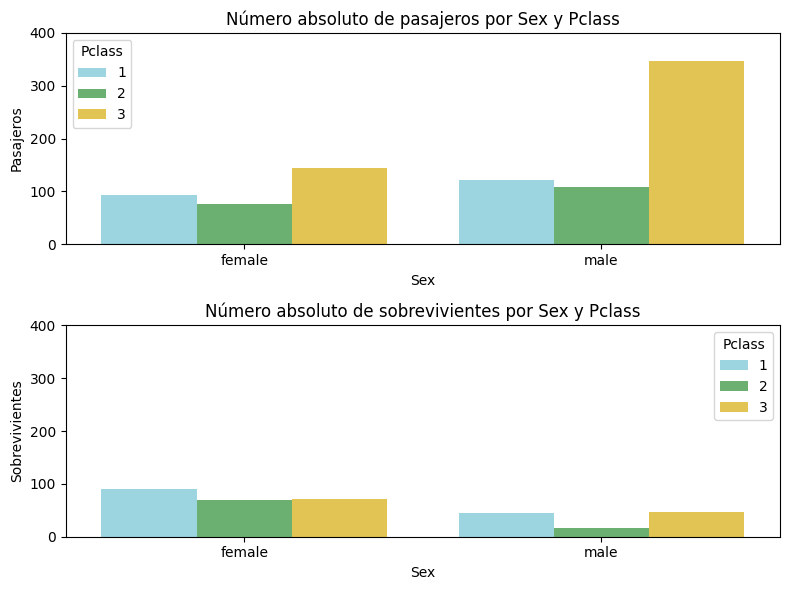

In [224]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
# Configuración de colores
colors = ['#91DCEA', '#5FBB68','#F9D23C', '#F9A729', '#FD6F30'] # Paleta azul para las clases
full_data['Sex'] = full_data['Sex'].astype('category')

variable1='Sex'
variable2='Pclass'


# Primer gráfico: Número absoluto de pasajeros por {variable1} y {variable2}

sns.countplot(x=variable1, hue=variable2, data=full_data, palette = colors, ax=axs[0])
axs[0].set_title(f"Número absoluto de pasajeros por {variable1} y {variable2}")
axs[0].set_xlabel(f"{variable1}")
axs[0].set_ylim(0,400)
axs[0].set_ylabel("Pasajeros")
axs[0].legend(title=f"{variable2}")

# Segundo gráfico: Número absoluto de sobrevivientes por {variable1} y {variable2}
sobrevivientes= full_data[full_data.Survived==1]

sns.countplot(x=variable1, hue=variable2, data=sobrevivientes, palette=colors, ax=axs[1])
axs[1].set_title(f"Número absoluto de sobrevivientes por {variable1} y {variable2}")
axs[1].set_xlabel(f"{variable1}")
axs[1].set_ylim(0,400)
axs[1].set_ylabel('Sobrevivientes')
axs[1].legend(title=f"{variable2}")

# Ajuste de diseño para evitar superposiciones
plt.tight_layout()
plt.show()

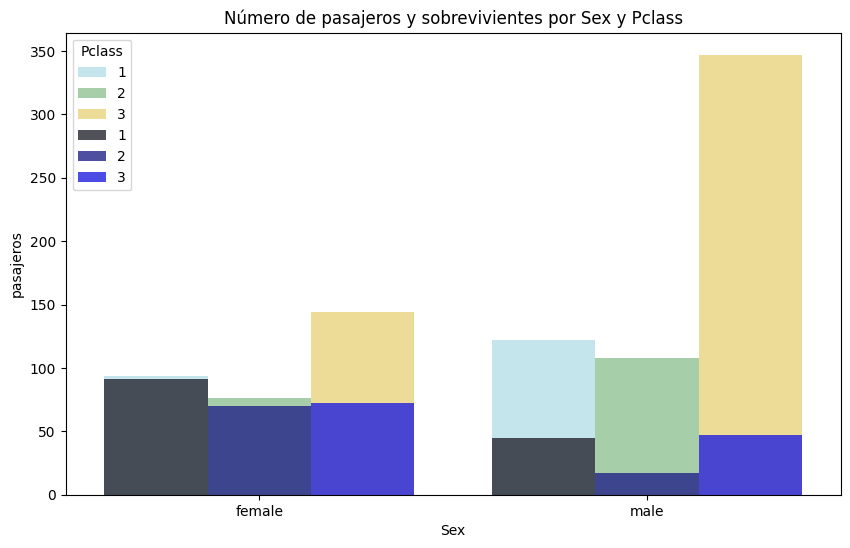

In [225]:
dataset=full_data
variable1='Sex'
variable2='Pclass'

# Configuración de colores
colors = ['#91DCEA', '#5FBB68','#F9D23C', '#F9A729', '#FD6F30'] # Paleta azul para las clases
 
# Crear tablas resumen que contenga el número de pasajeros por clase, sexo y supervivencia
pasajeros = dataset.groupby([variable1, variable2]).size().reset_index(name='count')
sobrevivientes = dataset[dataset['Survived'] == 1].groupby([variable1, variable2]).size().reset_index(name='count')
 
# Crear una figura para graficar
fig, ax = plt.subplots(figsize=(10, 6))
 
# Graficar el número de pasajeros por sexo y clase
sns.barplot(x=variable1, y='count', hue=variable2, data=pasajeros, ax=ax, palette= colors, alpha=0.6)
 
# Graficar el número de sobrevivientes por sexo y clase, sobreponiendo las barras
sns.barplot(x=variable1, y='count', hue=variable2, data=sobrevivientes, ax=ax, color='blue', alpha=0.8)
 
# Ajustar leyendas y títulos
ax.set_title(f'Número de pasajeros y sobrevivientes por {variable1} y {variable2}')
ax.set_ylabel('pasajeros')
ax.legend(title=f'{variable2}')
 
plt.show()

## **2.2.Gráficos de proporción**

Los gráficos de proporción son herramientas visuales utilizadas para mostrar cómo están proporcionados los datos de una variable en un dataset. Son fundamentales en el análisis exploratorio de datos porque permiten a los analistas entender rápidamente las características clave de los datos.



### **Diagramas de torta**


Un diagrama de torta, también conocido como gráfico de pastel o gráfico circular, es un tipo de gráfico que se utiliza para representar la proporción de diferentes categorías dentro de un conjunto de datos. En este gráfico, los datos se visualizan como "rebanadas" de un círculo, donde el tamaño de cada rebanada es proporcional al porcentaje o proporción que esa categoría representa del total. Para entender mejor la composición de los pasajeros en el conjunto de datos, se puede utilizar un gráfico de torta. Este gráfico visualiza la proporción de cada categoría de género dentro del total de pasajeros.


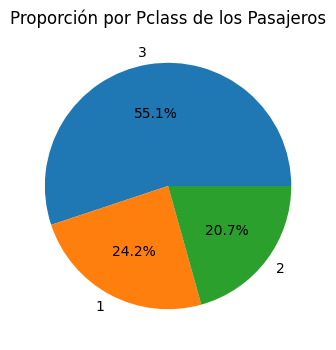

In [226]:
# Crear el gráfico de torta para la distribución de {variable}

variable='Pclass'

conteo_genero = full_data[variable].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%')
plt.title(f'Proporción por {variable} de los Pasajeros')
plt.show()

### **Treemap (gráfico de rectángulos)**

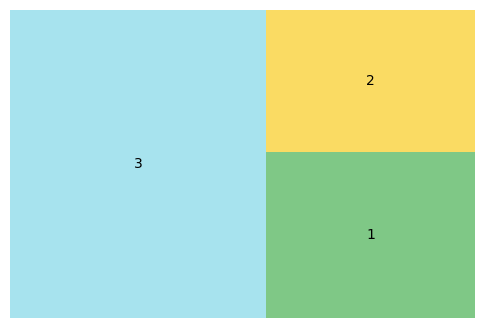

In [227]:
# Crear el gráfico treemap para la distribución de {variable}
dataset=full_data
variable='Pclass'

conteo = dataset[variable].value_counts()
colors = ['#91DCEA', '#5FBB68','#F9D23C', '#F9A729', '#FD6F30']

plt.figure(figsize=(6, 4))
squarify.plot(sizes=conteo, label=conteo.index, alpha=.8,color = colors)
plt.axis('off')
plt.show()

In [228]:
conteo = dataset[variable].value_counts()
conteo

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [229]:
cantidad= conteo.values
cantidad

array([491, 216, 184])

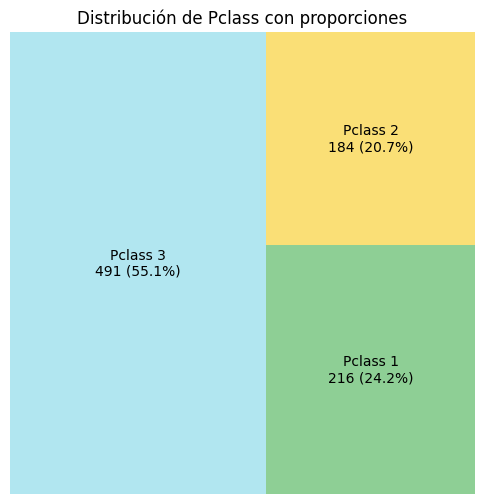

In [230]:
# Crear el gráfico treemap para la distribución de {variable}
dataset=full_data
variable = 'Pclass'

# Calcular las proporciones por clase
conteo = dataset[variable].value_counts()
etiquetas = conteo.index.astype(str)
cantidad= conteo.values
colors = ['#91DCEA', '#5FBB68','#F9D23C', '#F9A729', '#FD6F30']

# Crear etiquetas con proporciones
total = cantidad.sum()
etiquetas_con_pct = [f'{variable} {label}\n{size} ({size / total:.1%})' for label, size in zip(etiquetas, cantidad)]

# Crear el gráfico treemap
plt.figure(figsize=(6, 6))
squarify.plot(sizes=cantidad, label=etiquetas_con_pct, alpha=0.7, color=colors)
plt.title(f'Distribución de {variable} con proporciones')
plt.axis('off')  # Ocultar los ejes
plt.show()

## **2.3 Gráficos de Distribución**

Los gráficos de distribución son herramientas visuales utilizadas para mostrar cómo se distribuyen los datos de una variable o conjunto de variables en un dataset. Estos gráficos ayudan a identificar patrones como la forma, dispersión, centralidad y presencia de outliers en los datos. Son fundamentales en el análisis exploratorio de datos porque permiten a los analistas entender rápidamente las características clave de los datos.


### **Histograma**

Es similar a un gráfico de barras, pero se utiliza para representar la distribución de una variable continua.

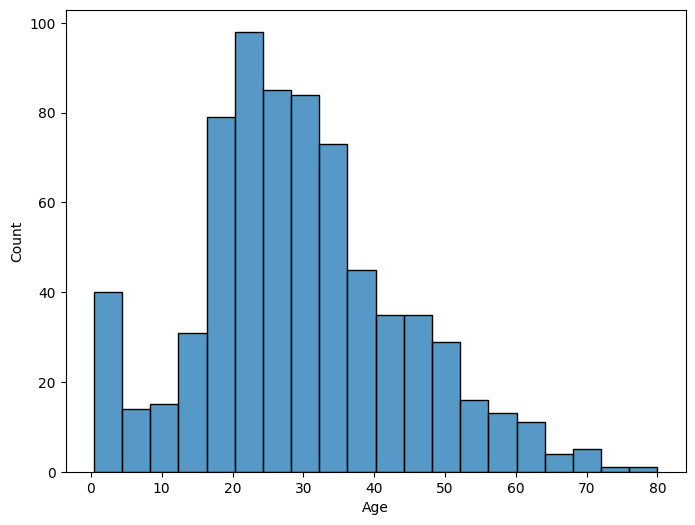

In [231]:
plt.figure(figsize=(8,6))

variable='Age'

sns.histplot(full_data[variable])
plt.show()

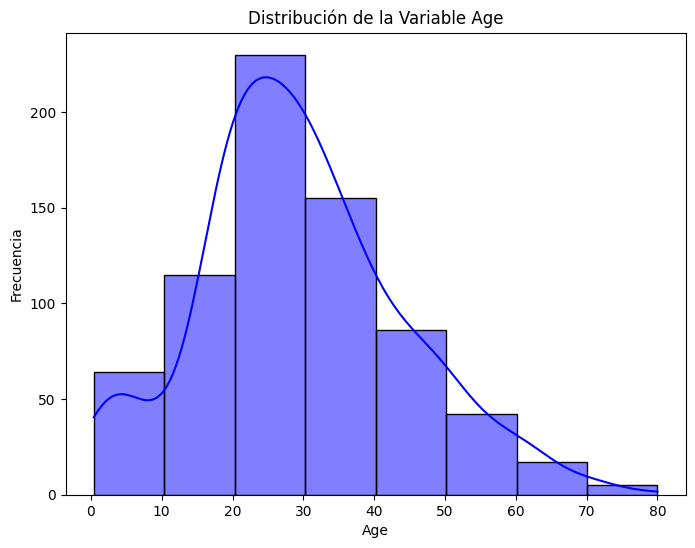

In [232]:
#creación de histograma reduciendo el número de agrupaciones
variable='Age' 
grupos=8  # cantidad de agrupaciones que se desean graficar
curva_densidad= True # poner True o False para incluir la curva de densidad

plt.figure(figsize=(8, 6))
sns.histplot(full_data[variable], bins=grupos, kde=curva_densidad, color='blue')
plt.title(f'Distribución de la Variable {variable}')
plt.xlabel(f'{variable}')
plt.ylabel('Frecuencia')
plt.show()  

### **Boxplot (Diagrama de caja y bigotes)**

Es una forma conveniente de visualizar la distribución de los datos a través de sus cuartiles. Los diagramas de caja suelen tener líneas verticales que se extienden desde las cajas, llamadas <strong>bigotes</strong>. Estos bigotes indican la variabilidad fuera de los cuartiles superior e inferior, por lo que los Boxplots también se conocen como <strong>diagrama de caja y bigotes</strong>. Los valores atípicos en los datos se representan como puntos individuales.

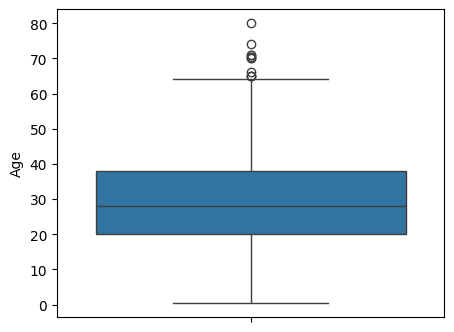

In [233]:
plt.figure(figsize=(5,4))

variable='Age' 

sns.boxplot(y=variable, data=full_data)
plt.show()

Este tipo de gráficas las podemos utilizar para una gran variedad de casos. Por ejemplo, en el caso en que queremos ver la edad de las personas de manera rápida, pero separándolas por género.

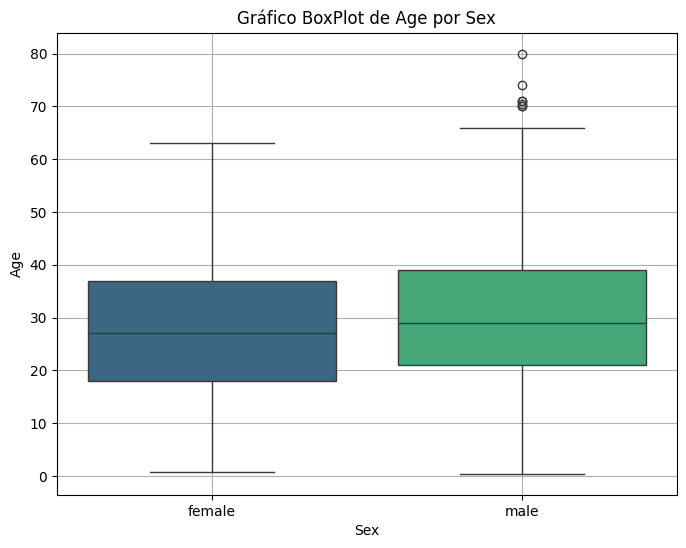

In [234]:
plt.figure(figsize=(8,6))

variable1='Sex'
variable2='Age'

sns.boxplot(x=variable1, y=variable2, data=full_data,palette='viridis')
plt.title(f'Gráfico BoxPlot de {variable2} por {variable1}')
plt.xlabel(f'{variable1}')
plt.ylabel(f'{variable2}')
plt.grid()
plt.show()

Otro ejemplo: ver la edad de las personas, separándolas por género y abierto por sobreviviente: si (1) , no (0)

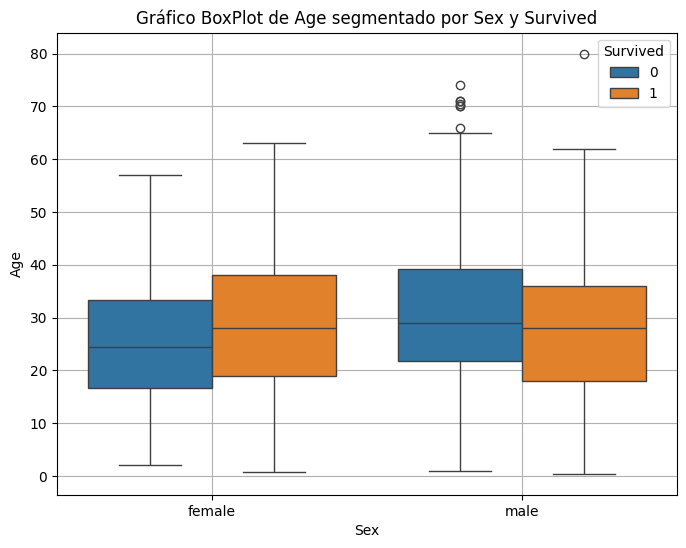

In [235]:
plt.figure(figsize=(8,6))

variable1='Sex'
variable2='Age'
variable3='Survived'

sns.boxplot(x=variable1, y=variable2, hue=variable3, data=full_data)

plt.title(f'Gráfico BoxPlot de {variable2} segmentado por {variable1} y {variable3}')
plt.xlabel(f'{variable1}')
plt.ylabel(f'{variable2}')
plt.grid()
plt.show()


plt.show()

**En las mujeres el promedio de edad de las sobrevientes fue mayor que las no sobrevientes, mientras que en el caso de los hombres fue al contrario**

## **Ejercicio práctico 1**

In [236]:
# Coloque su código aquí


## **2.4 Gráficos Relacionales**

Los gráficos relacionales son herramientas fundamentales en el análisis de datos que nos permiten explorar y visualizar cómo se relacionan dos o más variables entre sí. Estos gráficos son especialmente útiles para entender las asociaciones y patrones que pueden no ser evidentes al observar los datos en forma tabular, permitiendo una comprensión más profunda de cómo una variable afecta o se relaciona con otra. Son útiles para identificar tendencias, correlaciones, y patrones en los datos. 

**Tipos de Gráficos Relacionales:**

- **Gráfico de Dispersión (Scatter Plot):** Muestra la relación entre dos variables numéricas. Cada punto en el gráfico representa una observación en el conjunto de datos, con la posición en el eje X e Y correspondiente a los valores de las dos variables.
  
- **Gráfico de Líneas (Line Plot):** Ideal para visualizar la relación entre variables cuando una de ellas representa una medida de tiempo. Permite observar tendencias y cambios a lo largo del tiempo.
  
- **Gráfico de Relación (relplot):** Una función de Seaborn que permite crear gráficos de dispersión o de líneas con facilidad. La función <code>relplot()</code> es especialmente útil para crear gráficos que muestran cómo una variable se relaciona con otra, con opciones para ajustar el tipo de gráfico según el contexto.

### **Gráfico de dispersión (scatterplot)**

<strong>Scatter plot</strong> es un tipo de gráfico que se utiliza para visualizar la relación entre dos variables numéricas. Cada punto en el gráfico representa un par de valores de las dos variables, con una variable en el eje X y la otra en el eje Y. Este tipo de gráfico es muy útil para detectar patrones, tendencias, correlaciones, y posibles anomalías entre las dos variables.


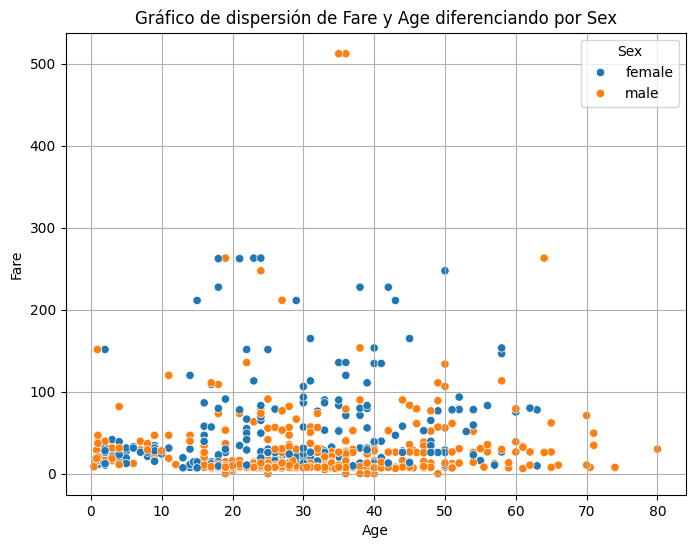

In [237]:
plt.figure(figsize=(8,6))

dataset=full_data
variable1='Age'
variable2='Fare'
variable3='Sex'

sns.scatterplot(x=variable1, y=variable2, hue=variable3, data=dataset)

plt.title(f'Gráfico de dispersión de {variable2} y {variable1} diferenciando por {variable3}')
plt.xlabel(f'{variable1}')
plt.ylabel(f'{variable2}')
plt.grid()
plt.show()

plt.show()

###  **Stripplot**


Un **stripplot** es un tipo de gráfico que se utiliza para representar la distribución de una variable numérica a lo largo de una variable categórica mediante puntos.


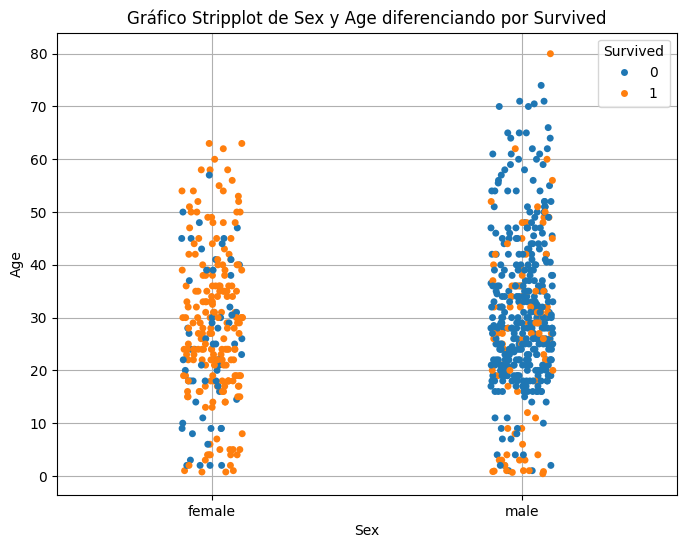

In [238]:
plt.figure(figsize=(8,6))

dataset=full_data
variable1='Age'
variable2='Sex'
variable3='Survived'

sns.stripplot(x=variable2, y=variable1, hue=variable3, data=dataset)

plt.title(f'Gráfico Stripplot de {variable2} y {variable1} diferenciando por {variable3}')
plt.xlabel(f'{variable2}')
plt.ylabel(f'{variable1}')
plt.grid()
plt.show()

plt.show()

### **swarmplot**

Un swarmplot es un tipo de gráfico en Seaborn que se utiliza para visualizar la distribución de datos categóricos mediante la disposición de puntos de forma que no se superpongan, a diferencia del stripplot, donde los puntos pueden solaparse. En un swarmplot, los puntos se dispersan de manera que cada uno de ellos sea visible, lo que facilita la interpretación de la distribución y la densidad de los datos dentro de cada categoría.


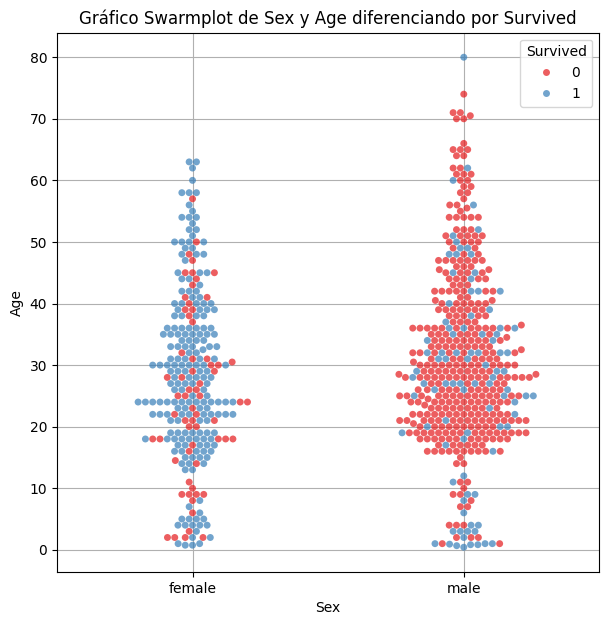

In [239]:
plt.figure(figsize=(7,7))

dataset=full_data
variable1='Age'
variable2='Sex'
variable3='Survived'

sns.swarmplot(x=variable2, y=variable1, hue=variable3, data=dataset, palette = sns.color_palette("Set1"), alpha = 0.7)

plt.title(f'Gráfico Swarmplot de {variable2} y {variable1} diferenciando por {variable3}')
plt.xlabel(f'{variable2}')
plt.ylabel(f'{variable1}')
plt.grid()
plt.show()


plt.show()

* Podemos decir que la mayoría de los pasajeros tienen aproximadamente entre 18 y 30 años
* La mayoría de los pasajeros a bordo eran hombres
* la mayoría de los supervivientes fueron mujeres

### **Matriz de correlación y mapas de calor (heatmap)**

Un heatmap o mapa de calor es un tipo de visualización gráfica que representa la magnitud de un fenómeno mediante el uso de colores en dos dimensiones. Es una herramienta útil para mostrar la relación entre dos variables (en los ejes X e Y) y para resaltar patrones, correlaciones, o distribuciones dentro de un conjunto de datos.

Ahora vamos a trazar la matriz de correlación de nuestros datos con un heatmap.

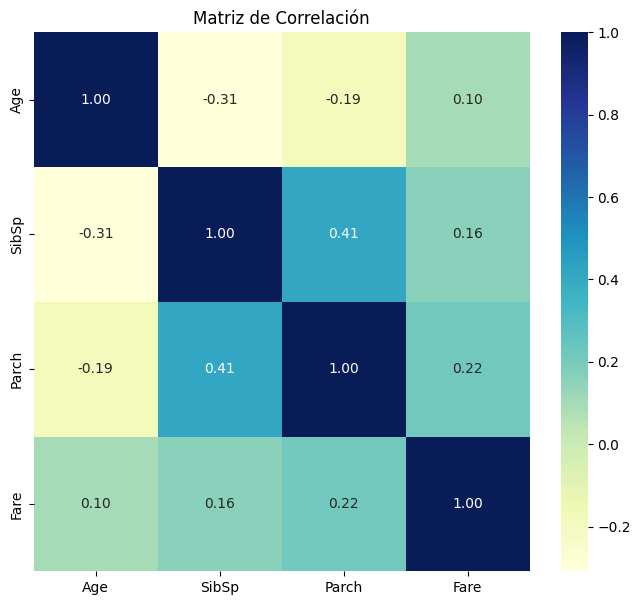

In [240]:
# Excluir campos por nombre
dataset=full_data

columnas_a_excluir = ['Name', 'PassengerId','Ticket','Survived', 'Pclass']
data_analisis = dataset.drop(columns=columnas_a_excluir)

# Selecciona solo columnas numéricas
numeric_data = data_analisis.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear el heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

**Observamos que:**
* La matriz de correlacion es simétrica (los valores por encima y por debajo de la diagonal son los mismos )

* las correlaciones entre estas variables son débiles (menores a 0,5).

* La correlacion más alta se presenta entre las variables 'Parch' y 'SibSp' y es positiva. 

### **Gráfico de Contingencia (Heatmap de Variables Categóricas):**

Sirve para visualizar la relación entre dos variables categóricas.
Ejemplo: Mostrar la relación entre Pclass y Survived.

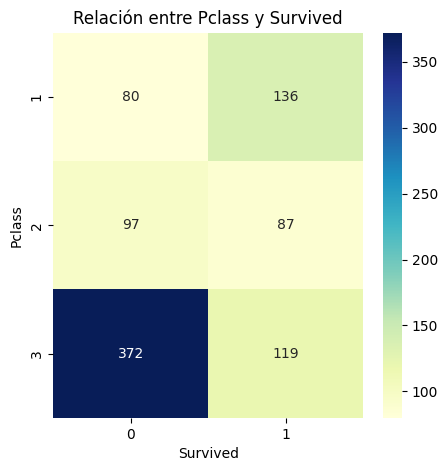

In [241]:
plt.figure(figsize=(5, 5))

dataset=full_data
variable1='Pclass'
variable2='Survived'

tabla_contingencia = pd.crosstab(dataset[variable1], dataset[variable2])
sns.heatmap(tabla_contingencia, annot=True, cmap="YlGnBu", fmt="d")
plt.title(f'Relación entre {variable1} y {variable2}')
plt.xlabel(f'{variable2}')
plt.ylabel(f'{variable1}')
plt.show()

## **Conclusiones**

El análisis realizado con diversas visualizaciones gráficas proporcionó una comprensión detallada de los datos sobre los pasajeros. Los histogramas y gráficos categóricos ayudaron a desglosar la distribución de características como la edad, la tarifa, el género y la clase de los pasajeros. Los gráficos de regresión y el heatmap aportaron información sobre las relaciones entre variables, y las visualizaciones adicionales como los FacetGrids permitieron una exploración más profunda de los datos.

En general, las conclusiones revelan patrones y relaciones clave entre las variables, proporcionando una base sólida para realizar análisis adicionales o construir modelos predictivos en el futuro.


### **Ejercicio práctico 2**

<a id="clasificacion"></a>

# **Capítulo 3: Algoritmos de Clasificación Titanic**

Hoy vamos a adentrarnos en una de las áreas más fundamentales y poderosas del aprendizaje automático: la clasificación. Imaginen por un momento que son los responsables de tomar decisiones críticas en una empresa, donde deben determinar si un cliente se quedará o abandonará el servicio, si un correo electrónico es spam o no, o incluso si una transacción es fraudulenta. Todas estas decisiones dependen de la capacidad para clasificar correctamente la información que tienen a su disposición.


<figure>
    <center>
        <img src='../Data/Images/titanic_classification.png' width="700" height="450" />
        <figcaption></figcaption>
    </center>
</figure>

### **Introducción al aprendizaje supervisado: El Desafío del Titanic**

#### ¿Por Qué Aprendizaje Supervisado?

 En el conjunto de datos del Titanic, nuestro objetivo es predecir si un pasajero sobrevivió o no. Este es un ejemplo clásico de un problema de machine learning supervisado, donde la variable objetivo es categórica con dos clases: "Sobrevivió" (1) y "No Sobrevivió" (0). 

<figure>
<center>
<img src='../Data/Images/emoji_clasificacion.png' width="550" height="250" />
<figcaption></figcaption></center>
</figure>

¡Vamos a embarcarnos en este viaje para desentrañar los secretos del conjunto de datos del Titanic y mejorar nuestras habilidades en clasificación binaria!

In [242]:
data_inicial = pd.read_csv('../Data/Inputs/Titanic-Dataset.csv')
data_inicial.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [243]:
df_0 = pd.read_csv('../Data/Inputs/data_preprocesada.csv')
df_0.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [244]:
# Conteo de la variable 'Survived' y sus proporciones
print(df_0["Survived"].value_counts())
print("")
print(df_0["Survived"].value_counts(True))

Survived
0    549
1    342
Name: count, dtype: int64

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


## **3.1 Entrenamiento y Prueba**

 1. **Pasajeros (Base de Datos)**: Es como una lista de todos tus pasajeros. Cada pasajero tiene información sobre si ha sobrevivido (1) o no (0).

**¿Cómo funciona?**

* Entrenar: Usamos X_entreno (información de pasajeros) y y_entreno (si sobrevivieron o no, variable objetivo, target) para enseñar al modelo. Es como cuando practicas para un examen usando algunos ejercicios.

* Probar: Luego, usamos X_prueba (nueva información de pasajeros) y y_prueba (resultados reales si sobrevivieron o no o no) para ver si el modelo predice correctamente. Es como tomar el examen real después de haber practicado.

En resumen, entrenar es como estudiar, y probar es como hacer el examen para ver si aprendiste bien.

In [245]:
# Separar características y variable objetivo
X = df_0.drop(columns=['Survived']) 
y = df_0['Survived']

In [246]:
# Dividir en conjunto de entrenamiento y prueba
porc_conjunto_prueba = 0.2
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=porc_conjunto_prueba, random_state=123)

<figure>
<center>
<img src='../Data/Images/Entrenamiento_prueba.png' width="950" height="400" />
<figcaption></figcaption></center>
</figure>


## **3.2 Regresión Logística**

<figure>
<center>
<img src='../Data/Images/logistic_regression.png' width="800" height="400" />
<figcaption></figcaption></center>
</figure>

La **regresión logística** es un modelo estadístico utilizado para predecir la probabilidad de una variable dependiente categórica, generalmente binaria. A diferencia de la regresión lineal, que se utiliza para variables continuas, la regresión logística estima la probabilidad de que un evento ocurra mediante una función logística, que transforma la salida lineal del modelo en una probabilidad entre 0 y 1. Esta técnica es ampliamente utilizada en problemas de clasificación, como la detección de fraude, diagnóstico médico y análisis de mercado.

En el contexto de aprendizaje automático, la regresión logística es valorada por su simplicidad y eficacia. Aunque se basa en un supuesto de relación lineal entre las características y la probabilidad de la clase positiva, su capacidad para manejar variables independientes e interpretar la importancia de las características la hace útil en una variedad de aplicaciones. La salida del modelo puede ser interpretada como una probabilidad, lo que facilita la toma de decisiones basadas en umbrales de probabilidad ajustables.

### **Entrenamiento del modelo**

In [ ]:
# Eliminar filas con valores NaN
X_entreno = X_entreno.dropna()

# Asegúrate de que las filas eliminadas de X_entreno se eliminen también en y_entreno
y_entreno = y_entreno[X_entreno.index]

# Entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_entreno, y_entreno)

LogisticRegression()

In [248]:
# Predicciones
y_pred_entreno_lr = model.predict(X_entreno)
y_pred_prueba_lr = model.predict(X_prueba)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Resultados
Resultados = X_entreno.copy()

# ahora es posible realizar la predicción en nuestros datos
Resultados['Probabilidad_Supervivencia']  = model.predict_proba(X_entreno)[:, 1]
Resultados['Prediccion_supervivencia'] = y_pred_entreno_lr

In [ ]:
Resultados.head()

## **3.3. Selección Métrica de desempeño**

En el contexto de la clasificación binaria, como el análisis del conjunto de datos del Titanic, es crucial evaluar cómo de bien está funcionando nuestro modelo al identificar las instancias correctas. En este ejercicio, estamos particularmente interesados en la métrica de **Recall**. Optimizar el **Recall** es importante porque queremos identificar el mayor número posible de pasajeros que sobrevivieron, lo cual es fundamental para evaluar cómo el modelo puede mejorar la identificación de sobrevivientes.


<figure>
<center>
<img src='../Data/Images/metricas_desempeno.png' width="900" height="450" />
<figcaption></figcaption></center>
</figure>


* **Recall (Sensibilidad):** ¿De todos los casos actuales, cuántos logra identificar mi algoritmo? De todos los pasajeros que realmente sobrevivieron, ¿cuántos logra identificar correctamente mi modelo?

In [ ]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrix_and_reports(y_entreno, y_pred_entreno_lr, title = 'Matriz de Confusión - Entrenamiento')

In [ ]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrix_and_reports(y_prueba, y_pred_prueba_lr, title = 'Matriz de Confusión - Prueba', cmap=plt.cm.Greens )

## **3.4 Árboles de Decisión**

<figure>
<center>
<img src='../Data/Images/arbol_decision_titanic.png' width="1200" height="600" />
<figcaption></figcaption></center>
</figure>

Un **árbol de decisión** es un modelo de aprendizaje automático utilizado para tareas de clasificación y regresión. En problemas de clasificación binaria, se usa para predecir a qué una de dos clases pertenece una muestra. El algoritmo divide los datos en nodos basados en preguntas sobre características específicas, con nodos internos representando las pruebas y nodos de hoja mostrando las clasificaciones finales. Utiliza criterios como la **impureza de Gini** o la **entropía** para decidir cómo dividir los datos. Sus ventajas incluyen una alta **interpretabilidad** y la no necesidad de normalización de datos, pero puede sufrir de **sobreajuste** y sensibilidad a pequeñas variaciones. Es útil para clasificar datos en dos categorías de manera clara y comprensible.




### **Entrenamiendo del Modelo**

In [ ]:
# Entrenar el árbol de decisión con un límite de profundidad
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_entreno, y_entreno)

In [ ]:
# Predicciones
y_pred_entreno_dt = clf.predict(X_entreno)
y_pred_prueba_dt = clf.predict(X_prueba)

In [ ]:
## Realice la validación de las predicciones para el árbol de decisión

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(24, 6))
plt.gcf().patch.set_facecolor('lightgrey')

# Visualizar el árbol de decisión
plot_tree(clf, 
          filled=True, 
          feature_names=X_entreno.columns, 
          class_names=['No Sobreviviente', 'Sobreviviente'], 
          rounded=True, 
          fontsize=10)  

plt.title('Árbol de Decisión - TITANIC')
plt.show()

In [ ]:
# Comparando resultados en conjunto de Entrenamiento
plot_confusion_matrix_and_reports(y_entreno, y_pred_entreno_dt, title = 'Matriz de Confusión - Entrenamiento')

In [ ]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrix_and_reports(y_prueba, y_pred_prueba_dt, title = 'Matriz de Confusión - Prueba', cmap=plt.cm.Greens )

## **3.5. Comparación Modelos**

Ahora, vamos a contruir un dataframe unificado con las metricas que hemos calculado y guardado para cada modelo con el fin de poder comparar:

In [ ]:
# Métricas para Regresión Logística
metrics_lr = compute_metrics(y_prueba, y_pred_prueba_lr)

# Métricas para Decision Tree
metrics_dt = compute_metrics(y_prueba, y_pred_prueba_dt)

In [ ]:
# Creación de un DataFrame unificado con las métricas de cada modelo construido
models_summary = pd.DataFrame({
    'Model': ['Logistic Regression',  'Decision Tree'],
    'Accuracy Test': [metrics_lr['accuracy'][0], metrics_dt['accuracy'][0]],
    'Precision Sobrevivientes': [metrics_lr['precision'][0], metrics_dt['precision'][0]],
    'Recall Sobrevivientes': [metrics_lr['recall'][0], metrics_dt['recall'][0]]
})

# Ordenar el DataFrame por la columna de Recall
models_summary.sort_values(by='Recall Sobrevivientes', ascending=False)

### Conclusiones

1. **Árbol de Decisión**: Este modelo muestra un **recall de 0.769** para los sobrevivientes, lo que indica que identifica correctamente el 76.9% de los sobrevivientes. Aunque su precisión (0.746) es inferior a la del clasificador de la regresión logística, su mayor valor de recall en comparación con la Regresión Logística sugiere que es menos probable que pase por alto a los sobrevivientes, lo cual es crucial en el contexto del Titanic.

2. **Regresión Logística**: Aunque tiene una **precisión de 0.806** y un **recall de 0.754**, lo que es consistente en cuanto a identificar sobrevivientes, su **accuracy en el test (82.12%)** es menor que la del Árbol de Decisión y el Random Forest. Esto indica que, aunque el recall es igual al de la Regresión Logística, el modelo no es tan robusto en términos generales como los otros modelos.

El modelo de **Árbol de Decisión** sigue siendo una opción sólida en este contexto, ya que maximiza el **recall** (0.769), asegurando que la mayor cantidad de sobrevivientes posibles sean identificados. Aunque el Random Forest tiene el mayor accuracy y precisión, el enfoque en el recall del Árbol de Decisión es crítico para minimizar el riesgo de pasar por alto a sobrevivientes.


## **3.6. Calificación de una nueva base**



<figure>
<center>
<img src='https://historysshadow.wordpress.com/wp-content/uploads/2014/09/arcona.jpg' width="600" height="300" />
<figcaption></figcaption></center>
</figure>



In [ ]:
nuevos_datos = pd.read_csv('../Data/Inputs/nuevos_datos.csv')

In [ ]:
print(nuevos_datos.shape)
print("")
nuevos_datos.head()

In [ ]:
#Crear un DataFrame con el resumen
summary_df = pd.DataFrame({
    'Valores Nulos': nuevos_datos.isnull().sum(),
    'Valores Únicos': nuevos_datos.nunique(),
    'Tipo de Dato': nuevos_datos.dtypes
})

# Mostrar la tabla
print(summary_df)

### **Preprocesamiento de datos**

Para calificar la nueva base de datos de pasajeros del Titanic, es fundamental aplicar una serie de transformaciones que aseguren la coherencia y calidad de los datos, así como su compatibilidad con el modelo de predicción entrenado. A continuación, se describen las transformaciones necesarias:

1. **Categoría Ordinal para 'Pclass'**: Convertimos la columna `Pclass` a una categoría ordinal para reflejar el orden natural de las clases (1, 2, 3), lo cual es importante para que el modelo interprete correctamente esta variable.

2. **Imputación de Edad por Promedio de Clase y Género**: Aplicamos una función de imputación que rellena los valores faltantes de la columna `Age` utilizando la media de edad de cada combinación de clase y género, mejorando así la precisión de las predicciones al mantener patrones realistas de edad.

3. **Manejo de Valores Faltantes en 'Fare'**: Filtramos los registros que contienen valores nulos en `Fare`, ya que esta variable es crucial para la predicción y no puede contener valores faltantes.

4. **One-Hot Encoding para 'Embarked'**: Realizamos una codificación one-hot en la columna `Embarked` para convertirla en variables binarias, facilitando la interpretación de esta variable categórica por parte del modelo. Rellenamos los valores faltantes con la moda antes de aplicar la codificación.

5. **Label Encoding para 'Sex'**: Codificamos la variable `Sex` usando un Label Encoder para transformar los valores categóricos en números, permitiendo que el modelo interprete la información de género.

6. **Eliminación de Variables Irrelevantes**: Eliminamos columnas como `PassengerId`, `Name`, `Ticket`, `Cabin` y `Embarked` (ya codificada), ya que no son necesarias para el modelo y podrían introducir ruido en la predicción.

7. **Tratamiento de outliers para variable Fare**: se utilizan métodos a partir de rangos intercuartilicos para transformación de outliers.

Estas transformaciones son esenciales para preparar los datos de entrada de manera que sean consistentes con el conjunto de datos de entrenamiento del modelo, mejorando así la precisión y utilidad de las predicciones.


In [ ]:
# variable categorica ordinal Pclass
pclass_categories = [1, 2, 3]  # Define el orden de las clases
nuevos_datos['Pclass'] = pd.Categorical(nuevos_datos['Pclass'], categories=pclass_categories, ordered=True) 

#imputación edad por promedio Clase y género
nuevos_datos['Age'] = nuevos_datos.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# filtramos valores na para Fare
nuevos_datos = nuevos_datos[nuevos_datos.Fare.notna()]

# Define las variables categóricas que se codificarán con one-hot encoding
categorical_vars = ['Sex', 'Embarked']
tipo_binarias = 'int'
nuevos_datos = pd.get_dummies(nuevos_datos, columns=categorical_vars, dtype=tipo_binarias)
columnas_eliminar = ['Sex_female', 'Embarked_Q']
nuevos_datos = nuevos_datos.drop(columns=columnas_eliminar)

# Eliminamos variables no necesarias para la calificación de nuestro árbol de decisión
nuevos_datos_00 = nuevos_datos.drop(columns=['PassengerId','Name','Ticket','Cabin']) 

In [ ]:
print(nuevos_datos_00.isnull().sum())

In [ ]:
print(nuevos_datos_00.shape)
print("")
nuevos_datos_00.head()

### **Predicción de nuevos datos transformados**

In [ ]:
# ahora es posible realizar la predicción en nuestros nuevos
nuevos_datos['Probabilidad_Supervivencia']  = clf.predict_proba(nuevos_datos_00)[:, 1]
nuevos_datos['Prediccion'] = clf.predict(nuevos_datos_00)
                                         
# Crear columna 'resultado' basada en la columna 'prediccion' usando np.where
nuevos_datos['Prediccion_Str'] = np.where(nuevos_datos['Prediccion'] == 1, 'Sobrevive', 'No sobrevive')

In [ ]:
nuevos_datos.head(20)

### Análisis de Supervivencia de Pasajeros del Titanic

Basado en los resultados de la predicción y las probabilidades de supervivencia para los pasajeros del Titanic, se pueden extraer las siguientes conclusiones relevantes:

1. **Mujeres en Primera Clase:**
   Las pasajeras femeninas en primera clase tienden a tener las probabilidades de supervivencia más altas. Por ejemplo, `Snyder, Mrs. John Pillsbury` y `Chaffee, Mrs. Herbert Fuller` tienen probabilidades de supervivencia del 96.15%. Este patrón refleja la priorización de mujeres y niños en los botes salvavidas, junto con las mejores condiciones de seguridad en primera clase.

2. **Pasajeros de Clase Baja y de Sexo Masculino:**
   Los hombres en tercera clase tienen las probabilidades de supervivencia más bajas. Por ejemplo, `Kelly, Mr. James` y `Wirz, Mr. Albert`, ambos en tercera clase, tienen probabilidades de supervivencia de 11.73% y 11.73%, respectivamente. Esto es consistente con la historia del Titanic, donde los hombres en tercera clase enfrentaron grandes dificultades para acceder a los botes salvavidas.

3. **Efecto del Género y Clase en la Supervivencia:**
   Generalmente, las mujeres tienen mayores probabilidades de sobrevivir en comparación con los hombres, incluso en tercera clase. Por ejemplo, `Hirvonen, Mrs. Alexander` (mujer, tercera clase) tiene una probabilidad de supervivencia del 57.84%, mientras que `Wirz, Mr. Albert` (hombre, tercera clase) tiene una probabilidad de 11.73%. Esto confirma que el género y la clase son factores determinantes importantes para la supervivencia.

4. **Pasajeros con Familiares a Bordo:**
   Algunos pasajeros con familiares a bordo, como `Wilkes, Mrs. James`, tienen una probabilidad de supervivencia del 57.84%. Esto sugiere que el hecho de tener familiares a bordo puede influir en las probabilidades de supervivencia, posiblemente facilitando el acceso a los botes salvavidas, aunque no siempre garantiza una alta probabilidad de supervivencia.

5. **Pasajeros con Tarifa Baja:**
   Los pasajeros con tarifas más bajas, como `Assaf Khalil, Mrs. Mariana` con una tarifa de 7.2250, tienen probabilidades de supervivencia del 57.84%. Esto indica que una tarifa baja no siempre se correlaciona directamente con una menor probabilidad de supervivencia, desafiando la percepción de que los pasajeros de tarifas más bajas tenían menos posibilidades de sobrevivir. Sin embargo, la relación sigue siendo un factor importante a considerar.

Estas conclusiones refuerzan el conocimiento histórico y social sobre los factores que influyeron en las tasas de supervivencia del Titanic y subrayan la importancia de las características demográficas, como el género y la clase social, en la determinación de los resultados de supervivencia.



<figure>
<center>
<img src='https://ichef.bbci.co.uk/ace/ws/800/cpsprodpb/48F4/production/_107767681_5-1.jpg.webp' width="800" height="400" />
<figcaption></figcaption></center>
</figure>
